<a href="https://colab.research.google.com/github/gmenendez0/7506R-2C2023-GRUPO07/blob/main/7506R_TP1_GRUPO07_CHP4_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.metrics import f1_score,  recall_score, precision_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

import tensorflow as tf
from tensorflow import keras
# from keras.utils.vis_utils import plot_model
# import visualkeras

np.random.seed(1)
tf.random.set_seed(1)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [6]:
dsTrain = pd.read_csv('dsCHPUltimo.csv')
dsTest = pd.read_csv('dsCHPTestUltimo.csv')
dsTrainCopy = dsTrain.copy()
dsTestCopy = dsTest.copy()
dsHotelTest = pd.read_csv('hotels_test.csv')

In [7]:
dsTrain

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,high_season_month,is_canceled
0,City Hotel,49,2016,9,5,1,2,1,0,0,...,0,No Deposit,A,0,Transient,115.50,0,1,0,1
1,Resort Hotel,4,2015,10,31,0,1,2,0,0,...,0,No Deposit,B,0,Transient,42.00,1,0,1,0
2,City Hotel,25,2016,10,13,0,1,2,2,0,...,0,No Deposit,A,0,Transient,229.00,0,2,1,0
3,City Hotel,26,2016,12,12,2,5,2,0,0,...,0,Non Refund,Others,0,Transient,75.00,0,0,0,1
4,City Hotel,104,2017,3,19,2,5,2,0,0,...,0,No Deposit,Others,0,Transient-Party,75.00,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60409,Resort Hotel,24,2017,1,27,0,2,2,0,0,...,0,No Deposit,F,0,Transient,48.00,0,1,0,1
60410,City Hotel,0,2016,9,2,0,1,1,0,0,...,0,No Deposit,B,0,Transient,149.00,0,0,0,0
60411,City Hotel,10,2017,5,8,1,2,1,0,0,...,0,No Deposit,B,0,Transient,95.00,0,0,1,0
60412,Resort Hotel,143,2015,10,10,2,5,2,0,0,...,0,Non Refund,Others,0,Transient,36.05,0,0,1,1


In [8]:
dsTest

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,high_season_month
0,City Hotel,277,2016,11,46,7,1,2,2,0,...,A,0,Non Refund,B,0,Transient,100.00,0,0,0
1,City Hotel,286,2016,5,20,11,0,4,2,0,...,A,0,No Deposit,Others,176,Transient-Party,101.00,0,0,1
2,City Hotel,0,2016,8,35,23,0,1,3,0,...,D,0,No Deposit,B,0,Transient,225.00,0,2,1
3,Resort Hotel,196,2016,10,44,29,2,5,2,2,...,G,0,No Deposit,F,0,Transient,96.00,0,0,1
4,Resort Hotel,232,2016,11,48,26,2,1,2,0,...,A,0,Non Refund,Others,0,Transient,30.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26530,City Hotel,31,2017,4,16,21,2,3,2,0,...,A,0,No Deposit,Others,0,Transient-Party,85.00,0,0,1
26531,City Hotel,130,2016,9,36,3,2,1,2,0,...,A,0,No Deposit,Others,0,Transient,80.75,0,0,0
26532,Resort Hotel,45,2016,8,35,22,1,1,2,0,...,A,0,No Deposit,F,0,Transient,231.00,0,0,1
26533,City Hotel,164,2017,8,32,10,2,4,2,0,...,A,0,No Deposit,Others,0,Transient,80.10,0,0,1


# Split del dataframe en Train y Test

In [9]:
XdsTrain= dsTrainCopy.drop(['is_canceled'], axis='columns', inplace=False)
ydsTrain = dsTrainCopy['is_canceled'].copy()

In [10]:
XTrain, XTest, yTrain, yTest = train_test_split(XdsTrain,
                                              ydsTrain,
                                              test_size=0.3,
                                              random_state=243)

In [11]:
XTrain.agent.value_counts()

Others    12049
A         11679
F          5107
B          5076
K          3016
X          1191
l          1136
u          1097
H           891
           525
N           522
Name: agent, dtype: int64

In [12]:
sscaler=StandardScaler()
variablesNumericas = ["lead_time", "arrival_date_year", "arrival_date_day_of_month",
                          "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies",
                          "previous_cancellations", "previous_bookings_not_canceled","adr",
                          "booking_changes", "days_in_waiting_list", "required_car_parking_spaces", "total_of_special_requests"]
XTrainStd = XTrain.copy()
XTestStd = XTest.copy()
dsTestStd = dsTestCopy.copy()

In [13]:
dsTestStd = dsTestCopy.copy()

# Feature Engeenering

## Standarizacion de variables

In [14]:
variablesNumericas

['lead_time',
 'arrival_date_year',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'adr',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [15]:
XTrainStd[variablesNumericas]= sscaler.fit_transform(pd.DataFrame(XTrain[variablesNumericas]))
XTestStd[variablesNumericas]= sscaler.fit_transform(pd.DataFrame(XTest[variablesNumericas]))

In [16]:
XTrainStd

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,high_season_month
41323,City Hotel,-1.015419,-0.221954,2,1.383582,1.090671,-0.827215,-1.864512,-0.254977,-0.081494,...,A,-0.326965,No Deposit,Others,-0.154175,Transient-Party,-0.965340,-0.227853,-0.675374,0
57406,City Hotel,0.015611,-0.221954,3,0.249690,-0.946446,-0.283187,0.281547,-0.254977,-0.081494,...,A,-0.326965,No Deposit,K,-0.154175,Transient-Party,-0.297761,-0.227853,-0.675374,0
3412,City Hotel,-0.120051,-0.221954,9,1.383582,-0.946446,0.804869,0.281547,-0.254977,-0.081494,...,A,-0.326965,No Deposit,Others,-0.154175,Transient-Party,0.814872,-0.227853,0.620434,0
53923,City Hotel,-0.382330,-0.221954,4,0.930025,1.090671,-0.827215,0.281547,-0.254977,-0.081494,...,D,-0.326965,No Deposit,A,-0.154175,Transient-Party,0.209600,-0.227853,-0.675374,1
53000,City Hotel,-0.246668,1.194405,8,-0.884202,-0.946446,-0.283187,0.281547,-0.254977,-0.081494,...,A,-0.326965,No Deposit,A,-0.154175,Transient,0.926135,-0.227853,1.916242,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30377,Resort Hotel,0.277891,-0.221954,7,0.022912,1.090671,1.348897,0.281547,-0.254977,-0.081494,...,E,-0.326965,No Deposit,Others,-0.154175,Transient,0.928360,-0.227853,-0.675374,1
47578,City Hotel,0.630612,1.194405,6,-0.884202,-0.946446,-0.283187,-1.864512,-0.254977,-0.081494,...,A,-0.326965,Non Refund,Others,-0.154175,Transient,0.369819,-0.227853,-0.675374,1
41074,City Hotel,-0.563213,-0.221954,12,-1.451148,-0.946446,-0.827215,0.281547,-0.254977,-0.081494,...,B,-0.326965,No Deposit,X,-0.154175,Transient,-0.538089,-0.227853,0.620434,0
11033,City Hotel,-0.961154,-0.221954,10,-1.110980,-0.946446,-0.827215,-1.864512,-0.254977,-0.081494,...,A,-0.326965,No Deposit,Others,-0.154175,Transient-Party,0.481082,-0.227853,-0.675374,1


Standarizacion de test

In [17]:
dsTestStd[variablesNumericas] = sscaler.fit_transform(pd.DataFrame(dsTestStd[variablesNumericas]))

In [18]:
XTrainStd['agent'].value_counts()

Others    12049
A         11679
F          5107
B          5076
K          3016
X          1191
l          1136
u          1097
H           891
           525
N           522
Name: agent, dtype: int64

In [19]:
XTestStd['agent'].value_counts()

A         5160
Others    5082
B         2206
F         2107
K         1313
X          482
l          469
u          453
H          408
          236
N          209
Name: agent, dtype: int64

## One Hot Encoding

In [20]:
columnasCategoricas = dsTrain.select_dtypes(include=['object'])
columnasCategoricas

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type
0,City Hotel,BB,USA,Online TA,TA/TO,D,D,No Deposit,A,Transient
1,Resort Hotel,BB,PRT,Groups,Direct,A,A,No Deposit,B,Transient
2,City Hotel,BB,Others,Online TA,TA/TO,F,F,No Deposit,A,Transient
3,City Hotel,BB,PRT,Groups,TA/TO,A,A,Non Refund,Others,Transient
4,City Hotel,BB,FRA,Offline TA/TO,TA/TO,A,A,No Deposit,Others,Transient-Party
...,...,...,...,...,...,...,...,...,...,...
60409,Resort Hotel,BB,ESP,Online TA,TA/TO,A,D,No Deposit,F,Transient
60410,City Hotel,SC,FRA,Online TA,TA/TO,A,A,No Deposit,B,Transient
60411,City Hotel,BB,FRA,Aviation,Corporate,A,A,No Deposit,B,Transient
60412,Resort Hotel,BB,PRT,Groups,TA/TO,A,A,Non Refund,Others,Transient


In [21]:
XTrainStdOHE = pd.get_dummies(XTrainStd, columns=columnasCategoricas.columns.to_list(), drop_first=True)
XTestStdOHE = pd.get_dummies(XTestStd, columns=columnasCategoricas.columns.to_list(), drop_first=True)
columnasInterseccion = set(XTrainStdOHE.columns).intersection(XTestStdOHE.columns)
XTrainStdOHE  = XTrainStdOHE[list(columnasInterseccion)]
XTestStdOHE = XTestStdOHE[list(columnasInterseccion)]

In [22]:
XTrainStdOHE

,high_season_month,assigned_room_type_G,previous_bookings_not_canceled,hotel_Resort Hotel,reserved_room_type_H,agent_l,meal_HB,distribution_channel_GDS,stays_in_weekend_nights,market_segment_Corporate,...,assigned_room_type_F,babies,agent_X,total_of_special_requests,country_GBR,distribution_channel_TA/TO,lead_time,required_car_parking_spaces,agent_u,market_segment_Online TA
41323,0,0,-0.076356,0,0,0,0,0,1.090671,0,...,0,-0.081494,0,-0.675374,0,1,-1.015419,-0.227853,0,0
57406,0,0,-0.076356,0,0,0,1,0,-0.946446,0,...,0,-0.081494,0,-0.675374,0,1,0.015611,-0.227853,0,0
3412,0,0,-0.076356,0,0,0,1,0,-0.946446,0,...,0,-0.081494,0,0.620434,0,1,-0.120051,-0.227853,0,0
53923,1,0,-0.076356,0,0,0,0,0,1.090671,0,...,0,-0.081494,0,-0.675374,0,1,-0.382330,-0.227853,0,1
53000,1,0,-0.076356,0,0,0,0,0,-0.946446,0,...,0,-0.081494,0,1.916242,0,1,-0.246668,-0.227853,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30377,1,0,-0.076356,1,0,0,1,0,1.090671,0,...,0,-0.081494,0,-0.675374,0,1,0.277891,-0.227853,0,0
47578,1,0,-0.076356,0,0,0,0,0,-0.946446,0,...,0,-0.081494,0,-0.675374,0,1,0.630612,-0.227853,0,0
41074,0,0,-0.076356,0,0,0,0,0,-0.946446,0,...,0,-0.081494,1,0.620434,0,0,-0.563213,-0.227853,0,0
11033,1,0,-0.076356,0,0,0,0,0,-0.946446,0,...,0,-0.081494,0,-0.675374,0,1,-0.961154,-0.227853,0,0


In [23]:
XTestStdOHE

,high_season_month,assigned_room_type_G,previous_bookings_not_canceled,hotel_Resort Hotel,reserved_room_type_H,agent_l,meal_HB,distribution_channel_GDS,stays_in_weekend_nights,market_segment_Corporate,...,assigned_room_type_F,babies,agent_X,total_of_special_requests,country_GBR,distribution_channel_TA/TO,lead_time,required_car_parking_spaces,agent_u,market_segment_Online TA
30445,0,0,-0.073959,0,0,0,0,0,-0.946972,0,...,0,-0.083668,0,-0.672846,0,1,0.185983,-0.214881,0,0
1792,0,0,-0.073959,0,0,0,0,0,-0.946972,0,...,0,-0.083668,0,-0.672846,0,1,-0.729435,-0.214881,0,1
52152,1,0,-0.073959,0,0,0,0,0,0.065228,0,...,0,-0.083668,0,-0.672846,0,1,0.131602,-0.214881,0,1
1833,1,0,-0.073959,0,0,0,0,0,-0.946972,0,...,1,-0.083668,0,-0.672846,0,1,1.056084,-0.214881,0,1
22205,1,0,-0.073959,1,0,0,0,0,-0.946972,0,...,0,-0.083668,0,-0.672846,0,1,-0.058732,-0.214881,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17234,0,0,-0.073959,0,0,0,0,0,-0.946972,0,...,0,-0.083668,0,-0.672846,0,1,-0.412211,-0.214881,0,0
6978,1,0,-0.073959,0,0,0,0,0,1.077427,0,...,0,-0.083668,0,-0.672846,0,1,0.222238,-0.214881,0,1
18620,1,0,-0.073959,0,0,0,0,0,-0.946972,0,...,0,-0.083668,0,-0.672846,0,1,0.104412,-0.214881,0,0
46969,1,0,-0.073959,1,0,0,0,0,-0.946972,0,...,0,-0.083668,0,0.620128,1,1,-0.910706,-0.214881,0,1


# Modelo 1

In [24]:
input_dim = len(XTrainStdOHE.columns)
num_classes = len(np.unique(yTrain))

In [25]:
num_classes

2

In [26]:
model = keras.Sequential()
model.add(keras.layers.Dense(128, activation='relu', input_shape=(input_dim,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               9472      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17793 (69.50 KB)
Trainable params: 17793 (69.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile

In [28]:
model.compile(  optimizer=keras.optimizers.SGD(learning_rate=0.01),
  loss='binary_crossentropy',
  # metricas para ir calculando en cada iteracion o batch
  metrics=['AUC'],)

## Fit

In [29]:
model.fit(XTrainStdOHE, yTrain, epochs=10, batch_size=32, verbose=0)

In [30]:
score = model.evaluate(XTestStdOHE, yTest)
print('Loss:', score[0])
print('F1:', score[1])

567/567 [==============================] - 3s 5ms/step - loss: 0.3398 - auc: 0.9266
Loss: 0.3397548198699951
F1: 0.9265657663345337


567/567 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      8875
           1       0.82      0.87      0.85      9250

    accuracy                           0.84     18125
   macro avg       0.84      0.84      0.84     18125
weighted avg       0.84      0.84      0.84     18125



Text(50.722222222222214, 0.5, 'True')

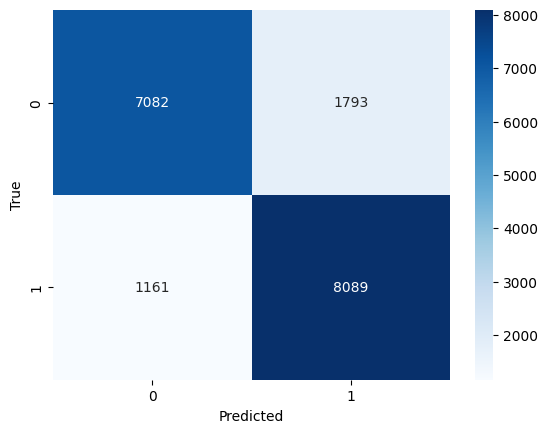

In [31]:
yPredict = model.predict(XTestStdOHE)
yPredictBinary = (yPredict> 0.5).astype(int).flatten()
print(classification_report(yTest,yPredictBinary))

cm = confusion_matrix(yTest,yPredictBinary )
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

# Modelo 2

In [68]:
input_dim = len(XTrainStdOHE.columns)
num_classes = len(np.unique(yTrain))

In [69]:
num_classes

2

In [116]:
modelTrain2 = keras.Sequential()
modelTrain2.add(keras.layers.Dense(150, activation='relu', input_shape=(input_dim,)))
modelTrain2.add(keras.layers.Dense(100, activation='relu'))
modelTrain2.add(keras.layers.Dense(50, activation='relu'))
modelTrain2.add(keras.layers.Dense(1, activation='sigmoid'))

In [118]:
modelTrain2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 150)               11100     
                                                                 
 dense_17 (Dense)            (None, 100)               15100     
                                                                 
 dense_18 (Dense)            (None, 50)                5050      
                                                                 
 dense_19 (Dense)            (None, 1)                 51        
                                                                 
Total params: 31301 (122.27 KB)
Trainable params: 31301 (122.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile

In [139]:
modelTrain2.compile(  optimizer=keras.optimizers.SGD(learning_rate=0.1),
  loss='binary_crossentropy',
  # metricas para ir calculando en cada iteracion o batch
  metrics=['AUC'],)

## Fit

In [140]:
modelTrain2.fit(XTrainStdOHE, yTrain, epochs=15, batch_size=50, verbose=0)

In [141]:
score = modelTrain2.evaluate(XTestStdOHE, yTest)
print('Loss:', score[0])
print('AUC:', score[1])

567/567 [==============================] - 1s 2ms/step - loss: 0.3297 - auc: 0.9414
Loss: 0.32966408133506775
AUC: 0.9413610696792603


567/567 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      8875
           1       0.85      0.88      0.87      9250

    accuracy                           0.86     18125
   macro avg       0.86      0.86      0.86     18125
weighted avg       0.86      0.86      0.86     18125



Text(50.722222222222214, 0.5, 'True')

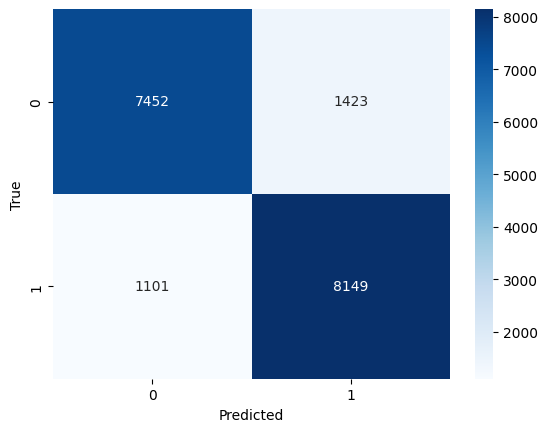

In [142]:
yPredict = modelTrain2.predict(XTestStdOHE)
yPredictBinary = (yPredict> 0.5).astype(int).flatten()
print(classification_report(yTest,yPredictBinary))

cm = confusion_matrix(yTest,yPredictBinary )
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

# Modelo 3

In [185]:
input_dim = len(XTrainStdOHE.columns)
num_classes = len(np.unique(yTrain))

In [186]:
num_classes

2

In [187]:
modelTrain3 = keras.Sequential()
modelTrain3.add(keras.layers.Dense(200, activation='relu', input_shape=(input_dim,)))
modelTrain3.add(keras.layers.Dense(150, activation='relu'))
modelTrain3.add(keras.layers.Dense(100, activation='relu'))
modelTrain3.add(keras.layers.Dense(50, activation='relu'))
modelTrain3.add(keras.layers.Dense(1, activation='sigmoid'))

In [188]:
modelTrain3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 200)               14800     
                                                                 
 dense_54 (Dense)            (None, 150)               30150     
                                                                 
 dense_55 (Dense)            (None, 100)               15100     
                                                                 
 dense_56 (Dense)            (None, 50)                5050      
                                                                 
 dense_57 (Dense)            (None, 1)                 51        
                                                                 
Total params: 65151 (254.50 KB)
Trainable params: 65151 (254.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile

In [189]:
modelTrain3.compile(  optimizer=keras.optimizers.SGD(learning_rate=0.1),
  loss='binary_crossentropy',
  # metricas para ir calculando en cada iteracion o batch
  metrics=['AUC'],)

## Fit

In [190]:
modelTrain3.fit(XTrainStdOHE, yTrain, epochs=15, batch_size=50, verbose=0)

In [191]:
score = modelTrain3.evaluate(XTestStdOHE, yTest)
print('Loss:', score[0])
print('AUC:', score[1])

567/567 [==============================] - 2s 3ms/step - loss: 0.2984 - auc: 0.9437
Loss: 0.2984263300895691
AUC: 0.9437228441238403


567/567 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      8875
           1       0.86      0.86      0.86      9250

    accuracy                           0.86     18125
   macro avg       0.86      0.86      0.86     18125
weighted avg       0.86      0.86      0.86     18125



Text(50.722222222222214, 0.5, 'True')

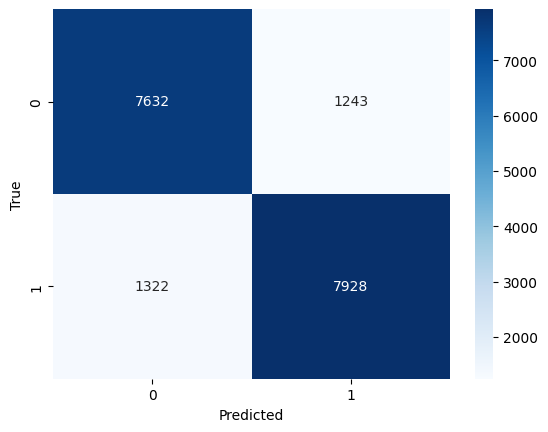

In [192]:
yPredict = modelTrain3.predict(XTestStdOHE)
yPredictBinary = (yPredict> 0.5).astype(int).flatten()
print(classification_report(yTest,yPredictBinary))

cm = confusion_matrix(yTest,yPredictBinary )
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

# Modelo 4

In [164]:
input_dim = len(XTrainStdOHE.columns)
num_classes = len(np.unique(yTrain))

In [165]:
num_classes

2

In [166]:
modelTrain4 = keras.Sequential()
modelTrain4.add(keras.layers.Dense(250, activation='relu', input_shape=(input_dim,)))
modelTrain4.add(keras.layers.Dense(200, activation='relu'))
modelTrain4.add(keras.layers.Dense(150, activation='relu'))
modelTrain4.add(keras.layers.Dense(100, activation='relu'))
modelTrain4.add(keras.layers.Dense(50, activation='relu'))
modelTrain4.add(keras.layers.Dense(1, activation='sigmoid'))

In [167]:
modelTrain4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 250)               18500     
                                                                 
 dense_43 (Dense)            (None, 200)               50200     
                                                                 
 dense_44 (Dense)            (None, 150)               30150     
                                                                 
 dense_45 (Dense)            (None, 100)               15100     
                                                                 
 dense_46 (Dense)            (None, 50)                5050      
                                                                 
 dense_47 (Dense)            (None, 1)                 51        
                                                                 
Total params: 119051 (465.04 KB)
Trainable params: 11

## Compile

In [172]:
modelTrain4.compile(  optimizer=keras.optimizers.SGD(learning_rate=0.15),
  loss='binary_crossentropy',
  # metricas para ir calculando en cada iteracion o batch
  metrics=['AUC'],)

## Fit

In [173]:
modelTrain4.fit(XTrainStdOHE, yTrain, epochs=15, batch_size=60, verbose=0)

In [174]:
score = modelTrain4.evaluate(XTestStdOHE, yTest)
print('Loss:', score[0])
print('AUC:', score[1])

567/567 [==============================] - 2s 3ms/step - loss: 0.2955 - auc: 0.9448
Loss: 0.2955147325992584
AUC: 0.9447999596595764


567/567 [==============================] - 2s 3ms/step
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      8875
           1       0.85      0.88      0.87      9250

    accuracy                           0.86     18125
   macro avg       0.86      0.86      0.86     18125
weighted avg       0.86      0.86      0.86     18125



Text(50.722222222222214, 0.5, 'True')

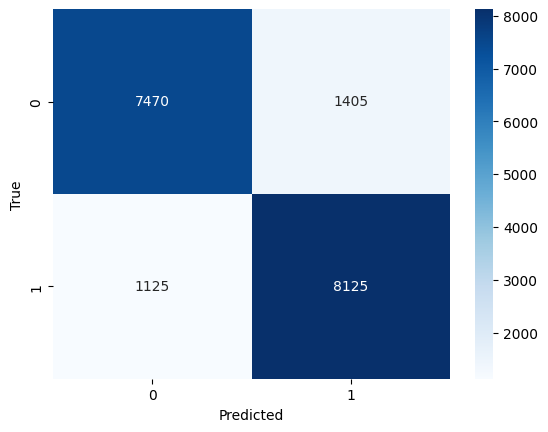

In [175]:
yPredict = modelTrain4.predict(XTestStdOHE)
yPredictBinary = (yPredict> 0.5).astype(int).flatten()
print(classification_report(yTest,yPredictBinary))

cm = confusion_matrix(yTest,yPredictBinary )
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

# Modelo 5

In [210]:
input_dim = len(XTrainStdOHE.columns)
num_classes = len(np.unique(yTrain))

In [211]:
num_classes

2

In [212]:
modelTrain5 = keras.Sequential()
modelTrain5.add(keras.layers.Dense(300, activation='relu', input_shape=(input_dim,)))
modelTrain5.add(keras.layers.Dense(250, activation='relu'))
modelTrain5.add(keras.layers.Dense(200, activation='relu'))
modelTrain5.add(keras.layers.Dense(150, activation='relu'))
modelTrain5.add(keras.layers.Dense(100, activation='relu'))
modelTrain5.add(keras.layers.Dense(50, activation='relu'))
modelTrain5.add(keras.layers.Dense(1, activation='sigmoid'))

In [213]:
modelTrain5.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 300)               22200     
                                                                 
 dense_73 (Dense)            (None, 250)               75250     
                                                                 
 dense_74 (Dense)            (None, 200)               50200     
                                                                 
 dense_75 (Dense)            (None, 150)               30150     
                                                                 
 dense_76 (Dense)            (None, 100)               15100     
                                                                 
 dense_77 (Dense)            (None, 50)                5050      
                                                                 
 dense_78 (Dense)            (None, 1)               

## Compile

In [214]:
modelTrain5.compile(  optimizer=keras.optimizers.SGD(learning_rate=0.15),
  loss='binary_crossentropy',
  # metricas para ir calculando en cada iteracion o batch
  metrics=['AUC'],)

## Fit

In [215]:
modelTrain5.fit(XTrainStdOHE, yTrain, epochs=30, batch_size=60, verbose=0)

In [216]:
score = modelTrain5.evaluate(XTestStdOHE, yTest)
print('Loss:', score[0])
print('AUC:', score[1])

567/567 [==============================] - 2s 3ms/step - loss: 0.3233 - auc: 0.9415
Loss: 0.3233374059200287
AUC: 0.9414839744567871


567/567 [==============================] - 2s 4ms/step
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      8875
           1       0.87      0.86      0.86      9250

    accuracy                           0.86     18125
   macro avg       0.86      0.86      0.86     18125
weighted avg       0.86      0.86      0.86     18125



Text(50.722222222222214, 0.5, 'True')

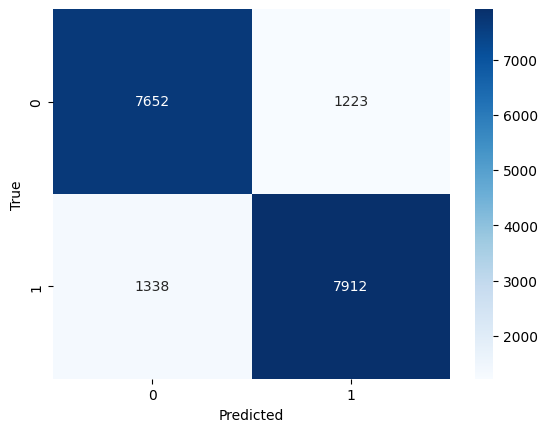

In [217]:
yPredict = modelTrain4.predict(XTestStdOHE)
yPredictBinary = (yPredict> 0.5).astype(int).flatten()
print(classification_report(yTest,yPredictBinary))

cm = confusion_matrix(yTest,yPredictBinary )
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

# Submission 1 a Kaggle

In [32]:
XTrainSub1 = XdsTrain.copy()
yTrainSub1 = ydsTrain.copy()
dsTestSub1 = dsTest.copy()

## Feature Engeneering

Eliminacion de columnas innecesarias

In [33]:
dsTestSub1 = dsTestSub1.drop('arrival_date_week_number', axis=1)

In [34]:
XTrainSub1Std = XTrainSub1.copy()
dsTestSub1Std = dsTestSub1.copy()

In [35]:
dsTestSub1Std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26535 entries, 0 to 26534
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           26535 non-null  object 
 1   lead_time                       26535 non-null  int64  
 2   arrival_date_year               26535 non-null  int64  
 3   arrival_date_month              26535 non-null  int64  
 4   arrival_date_day_of_month       26535 non-null  int64  
 5   stays_in_weekend_nights         26535 non-null  int64  
 6   stays_in_week_nights            26535 non-null  int64  
 7   adults                          26535 non-null  int64  
 8   children                        26535 non-null  int64  
 9   babies                          26535 non-null  int64  
 10  meal                            26535 non-null  object 
 11  country                         26535 non-null  object 
 12  market_segment                  

### Standarizacion de variables

In [36]:
XTrainSub1Std[variablesNumericas]= sscaler.fit_transform(pd.DataFrame(XTrainSub1[variablesNumericas]))
dsTestSub1Std[variablesNumericas]= sscaler.fit_transform(pd.DataFrame(dsTestSub1[variablesNumericas]))

### One Hot Encoding

In [37]:
XTrainSub1StdOHE = pd.get_dummies(XTrainSub1Std, columns=columnasCategoricas.columns.to_list(), drop_first=True)
dsTestSub1StdOHE = pd.get_dummies(dsTestSub1Std, columns=columnasCategoricas.columns.to_list(), drop_first=True)
columnasInterseccion = set(XTrainSub1StdOHE.columns).intersection(dsTestSub1StdOHE.columns)
XTrainSub1StdOHE  = XTrainSub1StdOHE[list(columnasInterseccion)]
dsTestSub1StdOHE = dsTestSub1StdOHE[list(columnasInterseccion)]

## Creacion del modelo

In [38]:
input_dim = len(XTrainSub1StdOHE.columns)
num_classes = len(np.unique(yTrainSub1))

In [39]:
num_classes

2

In [40]:
model = keras.Sequential()
model.add(keras.layers.Dense(128, activation='relu', input_shape=(input_dim,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               9344      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17665 (69.00 KB)
Trainable params: 17665 (69.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile

In [42]:
model.compile(  optimizer=keras.optimizers.SGD(learning_rate=0.01),
  loss='binary_crossentropy',
  # metricas para ir calculando en cada iteracion o batch
  metrics=['AUC'],)

## Fit

In [43]:
model.fit(XTrainSub1StdOHE, yTrainSub1, epochs=10, batch_size=32, verbose=0)

In [44]:
yPredict = model.predict(dsTestSub1StdOHE)

830/830 [==============================] - 1s 2ms/step


In [45]:
yPredict

array([[0.99838424],
       [0.82348835],
       [0.04755797],
       ...,
       [0.82527333],
       [0.8275216 ],
       [0.00558978]], dtype=float32)

In [46]:
yPredict_binary =np.where(yPredict>0.4,1,0)

In [47]:
yPredict_binary = yPredict_binary.flatten()

In [48]:
yPredict_binary

array([1, 1, 0, ..., 1, 1, 0])

In [49]:
dsCHP4Sub1 = pd.DataFrame(zip(dsHotelTest['id'], yPredict_binary), columns=['id', 'is_canceled'])
dsCHP4Sub1.to_csv("dsCHP4Sub2.csv",index=False)

# Submission 2 a Kaggle

In [50]:
XTrainSub2StdOHE = XTrainSub1StdOHE.copy()
yTrainSub2 = ydsTrain.copy()
dsTestSub2StdOHE = dsTestSub1StdOHE.copy()

## Creacion del modelo

In [51]:
input_dim = len(XTrainSub2StdOHE.columns)
num_classes = len(np.unique(yTrainSub2))

In [52]:
num_classes

2

In [53]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(128, activation='relu', input_shape=(input_dim,)))
model2.add(keras.layers.Dense(64, activation='relu'))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [54]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               9344      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17665 (69.00 KB)
Trainable params: 17665 (69.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile

In [55]:
model2.compile(  optimizer=keras.optimizers.SGD(learning_rate=0.01),
  loss='binary_crossentropy',
  # metricas para ir calculando en cada iteracion o batch
  metrics=['AUC'],)

## Fit

In [56]:
model2.fit(XTrainSub2StdOHE, yTrainSub2, epochs=10, batch_size=32, verbose=0)

In [57]:
yPredict = model2.predict(dsTestSub1StdOHE)

830/830 [==============================] - 1s 2ms/step


In [59]:
yPredict_binary =np.where(yPredict>0.5,1,0)

In [60]:
yPredict_binary = yPredict_binary.flatten()

In [62]:
dsCHP4Sub2 = pd.DataFrame(zip(dsHotelTest['id'], yPredict_binary), columns=['id', 'is_canceled'])
dsCHP4Sub2.to_csv("dsCHP4Sub2.csv",index=False)

# Submission 3 a Kaggle

In [228]:
XTrainSub3StdOHE = XTrainSub1StdOHE.copy()
yTrainSub3 = ydsTrain.copy()
dsTestSub3StdOHE = dsTestSub1StdOHE.copy()

## Creacion del modelo

In [229]:
input_dim = len(XTrainSub3StdOHE.columns)
num_classes = len(np.unique(yTrainSub2))

In [230]:
num_classes

2

Genero la misma arquitectura que el modelo 4, ya que fue la que menor loss me generoy ademas mas f1 score dio

In [231]:
model3 = keras.Sequential()
model3.add(keras.layers.Dense(250, activation='relu', input_shape=(input_dim,)))
model3.add(keras.layers.Dense(200, activation='relu'))
model3.add(keras.layers.Dense(150, activation='relu'))
model3.add(keras.layers.Dense(100, activation='relu'))
model3.add(keras.layers.Dense(50, activation='relu'))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [232]:
model3.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 250)               18250     
                                                                 
 dense_93 (Dense)            (None, 200)               50200     
                                                                 
 dense_94 (Dense)            (None, 150)               30150     
                                                                 
 dense_95 (Dense)            (None, 100)               15100     
                                                                 
 dense_96 (Dense)            (None, 50)                5050      
                                                                 
 dense_97 (Dense)            (None, 1)                 51        
                                                                 
Total params: 118801 (464.07 KB)
Trainable params: 11

## Compile

In [233]:
model3.compile( optimizer=keras.optimizers.SGD(learning_rate=0.15),
  loss='binary_crossentropy',
  # metricas para ir calculando en cada iteracion o batch
  metrics=['AUC'],)

## Fit

In [234]:
model3.fit(XTrainSub3StdOHE , yTrainSub3, epochs=15, batch_size=60, verbose=0)

In [235]:
yPredict = model3.predict(dsTestSub3StdOHE)

830/830 [==============================] - 2s 2ms/step


In [236]:
yPredict_binary =np.where(yPredict>0.5,1,0)

In [237]:
yPredict_binary = yPredict_binary.flatten()

In [238]:
dsCHP4Sub3 = pd.DataFrame(zip(dsHotelTest['id'], yPredict_binary), columns=['id', 'is_canceled'])
dsCHP4Sub3.to_csv("dsCHP4Sub3.csv",index=False)

Vamos a buscar la mejor combinacion de parametros usando Grid Cross Validation